In [14]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import cv2
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.preprocessing import LabelEncoder

In [2]:
data_train = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\prepo_datatrain.csv")
data_test = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\prepo_datatest.csv")
submission = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\house-prices-advanced-regression-techniques\\sample_submission.csv")

In [3]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool
0,1,60,3,65.0,8450,1,1,3,3,0,...,3,4,1,0,2,2008,8,4,208500,0
1,2,20,3,80.0,9600,1,1,3,3,0,...,3,4,1,0,5,2007,8,4,181500,0
2,3,60,3,68.0,11250,1,1,0,3,0,...,3,4,1,0,9,2008,8,4,223500,0
3,4,70,3,60.0,9550,1,1,0,3,0,...,3,4,1,0,2,2006,8,0,140000,0
4,5,60,3,84.0,14260,1,1,0,3,0,...,3,4,1,0,12,2008,8,4,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,...,3,4,1,0,8,2007,8,4,175000,0
1456,1457,20,3,85.0,13175,1,1,3,3,0,...,3,2,1,0,2,2010,8,4,210000,0
1457,1458,70,3,66.0,9042,1,1,3,3,0,...,3,0,3,2500,5,2010,8,4,266500,0
1458,1459,20,3,68.0,9717,1,1,3,3,0,...,3,4,1,0,4,2010,8,4,142125,0


In [4]:
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
0,1461,20,2,80.0,11622,1,1,3,3,0,...,0,2,2,1,0,6,2010,8,4,0
1,1462,20,3,81.0,14267,1,1,0,3,0,...,0,2,4,0,12500,6,2010,8,4,0
2,1463,60,3,74.0,13830,1,1,0,3,0,...,0,2,2,1,0,3,2010,8,4,0
3,1464,60,3,78.0,9978,1,1,0,3,0,...,0,2,4,1,0,6,2010,8,4,0
4,1465,120,3,43.0,5005,1,1,0,1,0,...,0,2,4,1,0,1,2010,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,1,3,3,0,...,0,2,4,1,0,6,2006,8,4,0
1455,2916,160,4,21.0,1894,1,1,3,3,0,...,0,2,4,1,0,4,2006,8,0,0
1456,2917,20,3,160.0,20000,1,1,3,3,0,...,0,2,4,1,0,9,2006,8,0,0
1457,2918,85,3,62.0,10441,1,1,3,3,0,...,0,2,2,3,700,7,2006,8,4,0


In [6]:
data_train.drop(columns='Id')
data_test.drop(columns='Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasPool
0,20,2,80.0,11622,1,1,3,3,0,4,...,0,2,2,1,0,6,2010,8,4,0
1,20,3,81.0,14267,1,1,0,3,0,0,...,0,2,4,0,12500,6,2010,8,4,0
2,60,3,74.0,13830,1,1,0,3,0,4,...,0,2,2,1,0,3,2010,8,4,0
3,60,3,78.0,9978,1,1,0,3,0,4,...,0,2,4,1,0,6,2010,8,4,0
4,120,3,43.0,5005,1,1,0,1,0,4,...,0,2,4,1,0,1,2010,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,1,3,3,0,4,...,0,2,4,1,0,6,2006,8,4,0
1455,160,4,21.0,1894,1,1,3,3,0,4,...,0,2,4,1,0,4,2006,8,0,0
1456,20,3,160.0,20000,1,1,3,3,0,4,...,0,2,4,1,0,9,2006,8,0,0
1457,85,3,62.0,10441,1,1,3,3,0,4,...,0,2,2,3,700,7,2006,8,4,0


In [7]:
X = data_train.drop(columns='SalePrice')
y = data_train['SalePrice']

In [13]:
y.value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

# modeling


In [15]:
def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5)
    }

    model = XGBRegressor(**params)
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
    return scores.mean()

In [16]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50,timeout=1200)

print('Best AUC score : ',study.best_value)
print('Best Hyperparameters : ',study.best_params)

[I 2025-05-05 08:24:15,031] A new study created in memory with name: no-name-436f98d3-f640-4596-827a-717e273ce4d1
[I 2025-05-05 08:24:20,337] Trial 0 finished with value: -28199.73237590583 and parameters: {'max_depth': 9, 'learning_rate': 0.06191653049890233, 'n_estimators': 455, 'subsample': 0.7951342951717304, 'colsample_bytree': 0.8038046476475567, 'gamma': 2.0216924711395383, 'min_child_weight': 10, 'reg_lambda': 2.085633878262738, 'reg_alpha': 0.948073793182993}. Best is trial 0 with value: -28199.73237590583.
[I 2025-05-05 08:24:25,269] Trial 1 finished with value: -28636.62529230222 and parameters: {'max_depth': 5, 'learning_rate': 0.0852222204821629, 'n_estimators': 619, 'subsample': 0.9389519704951708, 'colsample_bytree': 0.7239215143557338, 'gamma': 0.11617856073427912, 'min_child_weight': 9, 'reg_lambda': 4.823460600864792, 'reg_alpha': 2.008971901122714}. Best is trial 0 with value: -28199.73237590583.
[I 2025-05-05 08:24:28,239] Trial 2 finished with value: -26326.1682356

Best AUC score :  -25624.533102542966
Best Hyperparameters :  {'max_depth': 5, 'learning_rate': 0.03770023222036041, 'n_estimators': 693, 'subsample': 0.8826221387947544, 'colsample_bytree': 0.5059095347242112, 'gamma': 4.386953332474596, 'min_child_weight': 4, 'reg_lambda': 3.9975852781908654, 'reg_alpha': 0.3613376431031825}


In [17]:
best_model = XGBRegressor(
    **study.best_params,
    use_label_encoder=False,
    eval_metric='rmse',
    random_state=42
)

best_model.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5059095347242112, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=4.386953332474596, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03770023222036041, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=693, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [18]:
y_pred = best_model.predict(data_test)

In [19]:
scores = cross_val_score(best_model,X,y,cv=5,scoring='neg_root_mean_squared_error')
print("RMSE per fold:", -scores)  
print("Average RMSE:", -scores.mean())

RMSE per fold: [21378.07021617 31977.62097157 27460.14048771 19020.06838741
 27702.91873874]
Average RMSE: 25507.7637603191


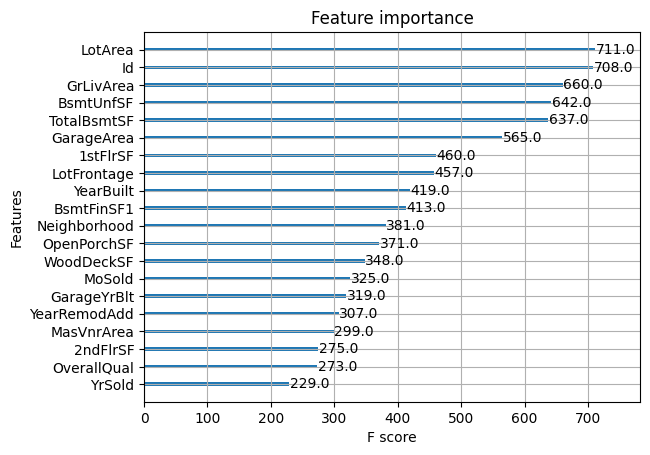

In [20]:
import xgboost as xgb

xgb.plot_importance(best_model,max_num_features=20)
plt.show()

In [21]:
submission = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\house-prices-advanced-regression-techniques\\sample_submission.csv")
submission = pd.DataFrame({
    'Id' : data_test['Id'],
    'SalePrice' : y_pred
})
submission.to_csv('submission_1.csv',index=False)